In [21]:
import pandas as pd
import torch
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer

# Load the model and tokenizer
model_name = "ElKulako/cryptobert"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, max_length=64, truncation=True, padding='max_length')



KeyboardInterrupt: 

In [45]:
# Read the Excel file
file_path = "data/stockwits/stockwits_crypto.xlsx"
df = pd.read_excel(file_path)

#change labels: "Bearish" : 0, "Neutral": 1, "Bullish": 2
def change_labels(label):
    if label == 0:
        return "Bearish"
    elif label == 1:
        return "Neutral"
    elif label == 2:
        return "Bullish"
    else:
        return None
    
df['label'] = df['label'].apply(change_labels)

In [46]:
df

,text,label
0,"if you were curious, price chose the lowest ch...",Neutral
1,"true, not even 10k followers here yet.",Neutral
2,dogecoin co-founder billy markus hits back at ...,Neutral
3,"i’m curious, do any bulls have a price where ...",Neutral
4,friday everybody buy 10 more on friday,Bullish
...,...,...
599995,so did i 850% with ! get in below a dollar. st...,Bullish
599996,notice it’s the same few brain dead people bas...,Bullish
599997,attention!!! anyone under the age of 18…. stea...,Bullish
599998,dickhead bears fucked. keep your big mouths s...,Bullish


In [47]:
#only include 20000 rows
df_new = df[:20000]

<Axes: xlabel='label'>

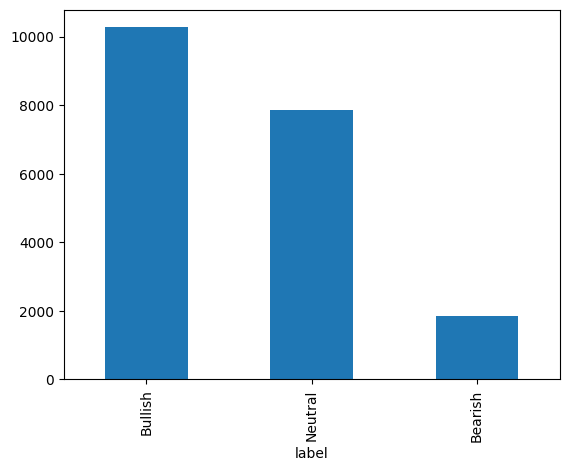

In [48]:
#plot distribution of labels
df_new['label'].value_counts().plot(kind='bar')

In [49]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# Assuming the dataframe has columns 'text' and 'label'
texts = df['text'].astype(str).tolist()  # Ensure texts are strings
true_labels = df['label'].tolist()

# Define a mapping from string labels to numeric labels
label_mapping = {"Bearish": 0, "Neutral": 1, "Bullish": 2}

# Inverse mapping from numeric labels to string labels
inv_label_mapping = {v: k for k, v in label_mapping.items()}

# Get predictions
predictions = pipe(texts)

# Extract predicted labels
predicted_labels = [label_mapping[pred['label']] for pred in predictions]

# Map true labels to numeric
true_labels_numeric = [label_mapping[label] for label in true_labels]

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels_numeric, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels_numeric, predicted_labels, average='weighted')

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

KeyboardInterrupt: 

In [41]:
predictions

[{'label': 'Neutral', 'score': 0.9972633123397827},
 {'label': 'Bullish', 'score': 0.9276890754699707},
 {'label': 'Neutral', 'score': 0.915134608745575},
 {'label': 'Neutral', 'score': 0.9763858318328857},
 {'label': 'Bullish', 'score': 0.5915706753730774},
 {'label': 'Neutral', 'score': 0.5838499069213867},
 {'label': 'Neutral', 'score': 0.7032335996627808},
 {'label': 'Neutral', 'score': 0.7337269186973572},
 {'label': 'Neutral', 'score': 0.9983429908752441},
 {'label': 'Bullish', 'score': 0.709452748298645},
 {'label': 'Neutral', 'score': 0.9959694147109985},
 {'label': 'Bullish', 'score': 0.6346802115440369},
 {'label': 'Neutral', 'score': 0.7016008496284485},
 {'label': 'Neutral', 'score': 0.7095096707344055},
 {'label': 'Neutral', 'score': 0.609869658946991},
 {'label': 'Neutral', 'score': 0.731570303440094},
 {'label': 'Bearish', 'score': 0.9104743599891663},
 {'label': 'Bullish', 'score': 0.6096915602684021},
 {'label': 'Neutral', 'score': 0.3940378427505493},
 {'label': 'Bull